In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
dir_path=os.getcwd()
dir_path=dir_path.replace("\\","/")

print(dir_path)

base_directory=dir_path+'/dataset'

train_dir=base_directory+'/train'
test_dir=base_directory+'/test'


C:/Users/Jayita


In [3]:
load_data=pd.read_csv(base_directory+'/train.csv')

In [4]:
load_data.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [5]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [6]:
train_image = []
for i in tqdm(range(load_data.shape[0])):
    img = image.load_img(train_dir+'/'+load_data['Image'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image,dtype="float")

100%|██████████| 364/364 [00:24<00:00,  2.86it/s]


In [8]:
X.shape
#print(X)

(364, 400, 400, 3)

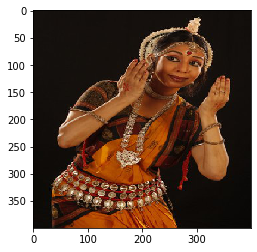

In [74]:
plt.imshow(X[2])

In [75]:
load_data['target'][2]

'odissi'

In [28]:
test_image = []
for i in tqdm(range(test_data.shape[0])):
    img = image.load_img(test_dir+'/'+test_data['Image'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
Y = np.array(test_image)

100%|██████████| 156/156 [00:07<00:00, 20.81it/s]


In [31]:
Y.shape

(156, 400, 400, 3)

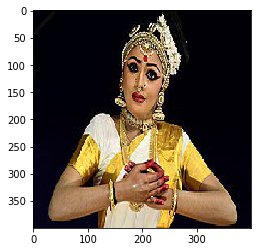

In [30]:
plt.imshow(Y[1])

In [7]:
from sklearn.preprocessing import LabelEncoder
y = np.array(load_data.drop(['Image'],axis=1))
#y.shape
#print(y)
lb=LabelEncoder()
y_new=np.array(lb.fit_transform(y),dtype="float")
print(y_new)

C:\Users\Jayita\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4. 0. 6. 2. 6. 1. 7. 3. 7. 3. 3. 3. 1. 7. 2. 6. 7. 3. 4. 1. 4. 0. 3. 3.
 5. 6. 1. 6. 6. 7. 2. 1. 2. 7. 0. 1. 0. 2. 6. 6. 6. 3. 4. 5. 5. 6. 1. 4.
 1. 5. 6. 7. 7. 6. 3. 7. 5. 4. 7. 1. 6. 7. 4. 2. 7. 2. 4. 0. 1. 1. 7. 0.
 2. 1. 5. 4. 1. 3. 6. 3. 0. 3. 0. 7. 1. 3. 5. 4. 5. 0. 6. 3. 6. 3. 0. 5.
 0. 0. 7. 1. 2. 5. 7. 0. 6. 1. 7. 7. 3. 6. 1. 4. 2. 0. 5. 2. 3. 4. 5. 0.
 5. 1. 2. 3. 0. 5. 0. 5. 2. 0. 5. 0. 4. 4. 7. 5. 7. 0. 6. 5. 6. 5. 2. 6.
 7. 0. 5. 6. 7. 4. 7. 7. 1. 6. 2. 0. 5. 1. 3. 4. 7. 2. 5. 2. 1. 7. 5. 0.
 0. 3. 6. 1. 6. 3. 5. 3. 6. 7. 0. 0. 2. 6. 5. 4. 6. 2. 5. 5. 3. 1. 5. 4.
 6. 6. 3. 2. 0. 2. 5. 0. 2. 5. 6. 4. 3. 0. 7. 3. 2. 5. 2. 7. 5. 1. 3. 5.
 3. 7. 5. 1. 5. 7. 6. 1. 1. 2. 5. 5. 7. 1. 0. 1. 4. 2. 7. 4. 3. 4. 1. 0.
 1. 3. 2. 2. 6. 3. 0. 2. 3. 2. 6. 0. 7. 7. 1. 0. 6. 7. 0. 6. 7. 5. 2. 2.
 3. 3. 6. 4. 6. 7. 1. 6. 4. 0. 3. 0. 7. 5. 4. 0. 2. 5. 0. 1. 2. 3. 0. 2.
 5. 2. 3. 7. 7. 5. 2. 7. 7. 3. 4. 2. 4. 4. 2. 2. 5. 3. 6. 7. 0. 0. 1. 1.
 3. 4. 2. 5. 2. 2. 3. 6. 6. 7. 4. 3. 6. 1. 2. 4. 2.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(400, 400, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.softmax)])

# Compile Model. 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])

# Train the Model
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train) // 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(X_test, y_test, batch_size=32),
                              validation_steps=len(X_test) // 32)

Epoch 1/10
